##MOVIE RECOMMNEDATION SYSTEM

*   Based on user's rating of each item, recommend similar items they might like
*   Two types of recommendor systems:
  * User Based Collaborative Filtering:
      * Works by building a matrix every pieace of content that user has bought or viewed.
      * Calculate similarity score between users based on the data.
      * Limitation: Not efficient as a lot of users compared to items. User taste can change over time.

  * Item Based Collaborative Filtering:
      * Will focus on the item instead of user.
      * Reduces the complexity of problem and the challenges of user-based filtering.








####Example of item based filtering


*   Suppose there are two users - User1 and User2
*   Suppose there are two moveis - Movie1 and Movie2
*   Both the users have watched both the movies and rater both movie as 5 stars.
*   From this we can infer that since both users were interested in both the movies, that means both of these movies might be similar. (Not a fact, just inference)
*   A new user comes User3 and watches Movie1 and likes it by rating it high. Now we can recommend Movie2 to User3 since we inferred that they are similar and User3 might like it based on that he/she liked Movie1.



In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!ls

Movie_Id_Titles  sample_data  u.data


In [ ]:
#Importing Datasets
movie_titles_df = pd.read_csv("Movie_Id_Titles")
movie_titles_df.describe()

,item_id
count,1682.000000
mean,841.500000
std,485.695893
min,1.000000
25%,421.250000
50%,841.500000
75%,1261.750000
max,1682.000000


In [ ]:
movie_titles_df.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [ ]:
movie_titles_df.tail(5)

,item_id,title
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)
1681,1682,Scream of Stone (Schrei aus Stein) (1991)


In [ ]:
movie_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [ ]:
movie_rating_df = pd.read_csv("u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])
movie_rating_df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [ ]:
movie_rating_df.head(5)

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [ ]:
movie_rating_df.tail(5)

,user_id,item_id,rating,timestamp
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


In [ ]:
movie_rating_df.drop("timestamp", axis=1, inplace=True)
movie_rating_df.head(5)

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [ ]:
movie_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [ ]:
#Merging the two dataframes so that we have all the info in one
movie_rating_merged_df = pd.merge(movie_rating_df, movie_titles_df, on="item_id")
movie_rating_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  100003 non-null  int64 
 1   item_id  100003 non-null  int64 
 2   rating   100003 non-null  int64 
 3   title    100003 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [ ]:
movie_rating_merged_df.head(15)

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
5,274,50,5,Star Wars (1977)
6,227,50,4,Star Wars (1977)
7,99,50,5,Star Wars (1977)
8,305,50,5,Star Wars (1977)
9,108,50,4,Star Wars (1977)


In [ ]:
movie_rating_merged_df.tail(15)

,user_id,item_id,rating,title
99988,655,1638,3,Normal Life (1996)
99989,782,1667,3,"Next Step, The (1995)"
99990,851,1675,3,"Sunchaser, The (1996)"
99991,234,1460,3,Sleepover (1995)
99992,532,1594,4,Everest (1998)
99993,416,1594,5,Everest (1998)
99994,648,1626,1,Nobody Loves Me (Keiner liebt mich) (1994)
99995,655,1645,4,"Butcher Boy, The (1998)"
99996,747,1659,1,Getting Away With Murder (1996)
99997,916,1682,3,Scream of Stone (Schrei aus Stein) (1991)


In [ ]:
#Visualizing the Dataset
movie_rating_merged_df.groupby("title").describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ...                 rating  \
                                         mean  ...     75%     max  count   
title                                          ...                          
'Til There Was You (1997)              1300.0  ...  1300.0  1300.0    9.0   
1-900 (1994)                           1353.0  ...  1353.0  1353.0    5.0   
101 Dalmatians (1996)                   225.0  ...   225.0   225.0  109.0   
12 Angry Men (1957)                     178.0  ...   178.0   178.0  125.0   
187 (1997)                              330.0  ...   330.0   330.0   41.0   
...                                       ...  ...     ...     ...    ...   
Young Guns II (1990)                   1188.0  ...  1188.0  1188.0   44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...   547.0   547.0   41.0   
Zeus and Roxanne (1997)                1164.0  ...  1164.0  1164.0    6.0   
unknown                                 267.0  ...   267.0   267.0    9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...  1633.0  1633.0    1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.

In [ ]:
movie_rating_merged_df.groupby("title")['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [ ]:
ratings_mean_df = movie_rating_merged_df.groupby("title")['rating'].describe()['mean']
ratings_mean_df.head()

,mean
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [ ]:
ratings_count_df = movie_rating_merged_df.groupby("title")['rating'].describe()['count']
ratings_count_df.head()

,count
title,
'Til There Was You (1997),9.0
1-900 (1994),5.0
101 Dalmatians (1996),109.0
12 Angry Men (1957),125.0
187 (1997),41.0


In [ ]:
ratings_mean_count_merged_df = pd.concat([ratings_mean_df, ratings_count_df], axis=1)
ratings_mean_count_merged_df.head()

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0


In [ ]:
ratings_mean_count_merged_df.reset_index(inplace=True)
ratings_mean_count_merged_df.head()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0


<Axes: ylabel='Frequency'>

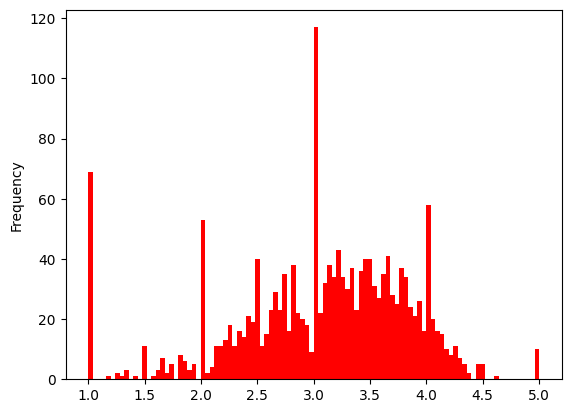

In [ ]:
ratings_mean_count_merged_df['mean'].plot(kind='hist', bins=100, color='r')

<Axes: ylabel='Frequency'>

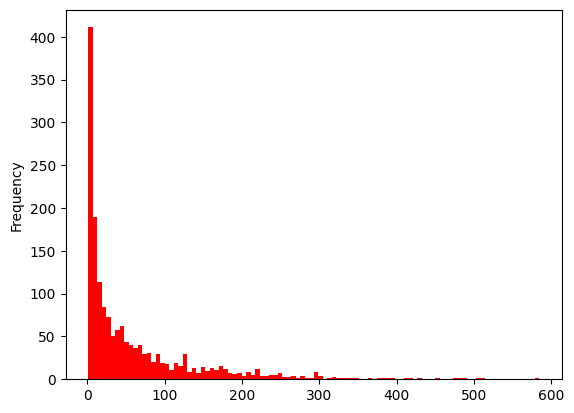

In [ ]:
ratings_mean_count_merged_df['count'].plot(kind='hist', bins=100, color='r')

In [ ]:
ratings_mean_count_merged_df[ ratings_mean_count_merged_df['mean'] == 5]

,title,mean,count
30,Aiqing wansui (1994),5.0,1.0
462,Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
633,"Great Day in Harlem, A (1994)",5.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.0,1.0
1172,Prefontaine (1997),5.0,3.0
1273,"Saint of Fort Washington, The (1993)",5.0,2.0
1277,Santa with Muscles (1996),5.0,2.0
1359,Someone Else's America (1995),5.0,1.0
1387,Star Kid (1997),5.0,3.0
1472,They Made Me a Criminal (1939),5.0,1.0


In [ ]:
ratings_mean_count_merged_df[ ratings_mean_count_merged_df['mean'] == 1]

,title,mean,count
8,3 Ninjas: High Noon At Mega Mountain (1998),1.0,5.0
60,Amityville 1992: It's About Time (1992),1.0,5.0
65,Amityville: A New Generation (1993),1.0,5.0
66,Amityville: Dollhouse (1996),1.0,3.0
103,August (1996),1.0,1.0
...,...,...,...
1582,"Very Natural Thing, A (1974)",1.0,1.0
1584,"Vie est belle, La (Life is Rosey) (1987)",1.0,1.0
1610,Wend Kuuni (God's Gift) (1982),1.0,1.0
1646,"Woman in Question, The (1950)",1.0,1.0


In [ ]:
ratings_mean_count_merged_df.sort_values('count', ascending=False).head(100)

,title,mean,count
1398,Star Wars (1977),4.359589,584.0
333,Contact (1997),3.803536,509.0
498,Fargo (1996),4.155512,508.0
1234,Return of the Jedi (1983),4.007890,507.0
860,Liar Liar (1997),3.156701,485.0
...,...,...,...
36,Aladdin (1992),3.812785,219.0
109,Babe (1995),3.995434,219.0
1588,Volcano (1997),2.808219,219.0
1507,To Kill a Mockingbird (1962),4.292237,219.0


In [ ]:
ratings_mean_count_merged_df.sort_values('count', ascending=True).head(100)

,title,mean,count
1663,Á köldum klaka (Cold Fever) (1994),3.0,1.0
980,Mille bolle blu (1993),1.0,1.0
951,Mat' i syn (1997),1.0,1.0
944,Marlene Dietrich: Shadow and Light (1996),5.0,1.0
931,"Man from Down Under, The (1943)",1.0,1.0
...,...,...,...
1468,The Courtyard (1995),1.0,1.0
1584,"Vie est belle, La (Life is Rosey) (1987)",1.0,1.0
1330,"Silence of the Palace, The (Saimt el Qusur) (1...",3.0,1.0
1582,"Very Natural Thing, A (1974)",1.0,1.0


In [ ]:
ratings_mean_count_merged_df.describe()

,mean,count
count,1664.000000,1664.000000
mean,3.077010,60.097957
std,0.780411,80.963482
min,1.000000,1.000000
25%,2.665094,7.000000
50%,3.162132,27.000000
75%,3.651808,80.250000
max,5.000000,584.000000


In [ ]:
#Performing Item-based collaborative filtering.
movie_rating_merged_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [ ]:
userid_movietitle_matrix = movie_rating_merged_df.pivot_table(index="user_id", columns="title", values="rating")
userid_movietitle_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
titanic = userid_movietitle_matrix["Titanic (1997)"]
titanic

,Titanic (1997)
user_id,
0,NaN
1,NaN
2,5.0
3,NaN
4,NaN
...,...
939,NaN
940,5.0
941,NaN


In [ ]:
starwars = userid_movietitle_matrix["Star Wars (1977)"]
starwars

,Star Wars (1977)
user_id,
0,5.0
1,5.0
2,5.0
3,NaN
4,5.0
...,...
939,NaN
940,4.0
941,NaN


In [ ]:
titanic_correlation = pd.DataFrame(userid_movietitle_matrix.corrwith(titanic), columns=['Correlations'])
titanic_correlation.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,Correlations
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113
12 Angry Men (1957),0.077700
187 (1997),0.315654


In [ ]:
titanic_correlation = titanic_correlation.merge(ratings_mean_count_merged_df[['title', 'count']], on='title', how='left')
titanic_correlation

,title,Correlations,count
0,'Til There Was You (1997),-0.062017,9.0
1,1-900 (1994),NaN,5.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
...,...,...,...
1659,Young Guns II (1990),0.317274,44.0
1660,"Young Poisoner's Handbook, The (1995)",0.356783,41.0
1661,Zeus and Roxanne (1997),NaN,6.0
1662,unknown,NaN,9.0


In [ ]:
titanic_correlation.dropna(inplace=True)
#Showing correlation of every movie with titanic
titanic_correlation

,title,Correlations,count
0,'Til There Was You (1997),-0.062017,9.0
2,101 Dalmatians (1996),0.120113,109.0
3,12 Angry Men (1957),0.077700,125.0
4,187 (1997),0.315654,41.0
5,2 Days in the Valley (1996),0.017295,93.0
...,...,...,...
1655,Year of the Horse (1997),1.000000,7.0
1657,Young Frankenstein (1974),0.107666,200.0
1658,Young Guns (1988),0.199931,101.0
1659,Young Guns II (1990),0.317274,44.0


In [ ]:
titanic_correlation.sort_values('Correlations', ascending=False)

,title,Correlations,count
1038,Nadja (1994),1.0,8.0
1140,"Pest, The (1997)",1.0,8.0
1278,"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
541,For Ever Mozart (1996),1.0,3.0
779,"Jerky Boys, The (1994)",1.0,3.0
...,...,...,...
1130,Pather Panchali (1955),-1.0,8.0
72,Angel Baby (1995),-1.0,4.0
189,Blood Beach (1981),-1.0,6.0
1548,Two Bits (1995),-1.0,5.0


In [ ]:
titanic_correlation[titanic_correlation['count'] > 80].sort_values('Correlations', ascending=False).head(15)

,title,Correlations,count
1500,Titanic (1997),1.000000,350.0
1244,"River Wild, The (1994)",0.497600,146.0
16,"Abyss, The (1989)",0.472103,151.0
223,Bram Stoker's Dracula (1992),0.443560,120.0
1533,True Lies (1994),0.435104,208.0
1632,William Shakespeare's Romeo and Juliet (1996),0.430243,106.0
846,"Last of the Mohicans, The (1992)",0.427239,128.0
1113,Outbreak (1995),0.426237,104.0
402,Demolition Man (1993),0.411489,92.0
414,Die Hard (1988),0.403124,243.0


In [ ]:
starwars_correlation = pd.DataFrame(userid_movietitle_matrix.corrwith(starwars), columns=['Correlations'])
starwars_correlation = starwars_correlation.merge(ratings_mean_count_merged_df[['title', 'count']], on='title', how='left')
starwars_correlation.dropna(inplace=True)
starwars_correlation[starwars_correlation['count'] > 80].sort_values('Correlations', ascending=False).head(15)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,title,Correlations,count
1398,Star Wars (1977),1.000000,584.0
456,"Empire Strikes Back, The (1980)",0.748353,368.0
1234,Return of the Jedi (1983),0.672556,507.0
1205,Raiders of the Lost Ark (1981),0.536117,420.0
104,Austin Powers: International Man of Mystery (1...,0.377433,130.0
1407,"Sting, The (1973)",0.367538,241.0
747,Indiana Jones and the Last Crusade (1989),0.350107,331.0
1156,Pinocchio (1940),0.347868,101.0
567,"Frighteners, The (1996)",0.332729,115.0
829,L.A. Confidential (1997),0.319065,297.0


In [ ]:
#Create item-based collaborative filter on entire dataset
userid_movietitle_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
movie_correlation_matrix = userid_movietitle_matrix.corr(method='pearson', min_periods= 80)
movie_correlation_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
my_ratings = [['Liar Liar (1997)', 5], ['Star Wars (1977)', 5]]
my_ratings_df = pd.DataFrame(my_ratings, columns=['title', 'rating'])
my_ratings_df

,title,rating
0,Liar Liar (1997),5
1,Star Wars (1977),5


In [ ]:
similar_movies_list = []
for i in range(0, len(my_ratings_df['title'])):
  similar_movies = movie_correlation_matrix[my_ratings_df['title'][i]].dropna()
  similar_movies = similar_movies.map(lambda x: x * my_ratings_df['rating'][i]) #Assigning a weight based on my rating and similarity
  similar_movies_list.append(similar_movies)
similar_movies_list = pd.concat(similar_movies_list).reset_index()
similar_movies_list.head()

,title,0
0,2001: A Space Odyssey (1968),-0.289321
1,Absolute Power (1997),1.201517
2,"Abyss, The (1989)",1.227062
3,Air Force One (1997),0.927007
4,Aladdin (1992),1.772528


In [ ]:
similar_movies_list.columns = ['title', 'correlation']
similar_movies_list.sort_values('correlation', ascending=False, inplace=True)
similar_movies_list.head(10)

,title,correlation
126,Liar Liar (1997),5.000000
531,Star Wars (1977),5.000000
334,"Empire Strikes Back, The (1980)",3.741763
488,Return of the Jedi (1983),3.362779
480,Raiders of the Lost Ark (1981),2.680586
39,Con Air (1997),2.349141
157,Pretty Woman (1990),2.348951
135,Michael (1996),2.210110
113,Indiana Jones and the Last Crusade (1989),2.072136
212,Top Gun (1986),2.028602


In [ ]:
my_ratings_2 = [['Top Gun (1986)', 4], ['Pretty Woman (1990)', 2]]
my_ratings_df_2 = pd.DataFrame(my_ratings_2, columns=['title', 'rating'])
my_ratings_df_2

,title,rating
0,Top Gun (1986),4
1,Pretty Woman (1990),2


In [ ]:
similar_movies_list_2 = []
for i in range(0, len(my_ratings_df_2['title'])):
  similar_movies = movie_correlation_matrix[my_ratings_df_2['title'][i]].dropna()
  similar_movies = similar_movies.map(lambda x: x * my_ratings_df_2['rating'][i]) #Assigning a weight based on my rating and similarity
  similar_movies_list_2.append(similar_movies)
similar_movies_list_2 = pd.concat(similar_movies_list_2).reset_index()
similar_movies_list_2.columns = ['title', 'correlation']
similar_movies_list_2.sort_values('correlation', ascending=False, inplace=True)
similar_movies_list_2.head(10)

,title,correlation
163,Top Gun (1986),4.000000
118,Pretty Woman (1990),2.458577
54,Eraser (1996),2.146007
60,"Firm, The (1993)",2.045274
86,Independence Day (ID4) (1996),2.016665
244,Pretty Woman (1990),2.000000
69,Ghost (1990),1.992238
93,"Last of the Mohicans, The (1992)",1.922874
168,Twister (1996),1.814593
49,Dragonheart (1996),1.807133
